<a href="https://colab.research.google.com/github/ArjunHanda/cancer-cell-detection/blob/main/cancer_cell_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!chmod 600 ~/.kaggle/kaggle.json


In [3]:

!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.18G/5.20G [00:39<00:00, 225MB/s]
100% 5.20G/5.20G [00:39<00:00, 141MB/s]


# New Section

In [4]:
import pandas as pd


In [5]:
!unzip /content/skin-cancer-mnist-ham10000.zip


Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [6]:
metadata = pd.read_csv("/content/HAM10000_metadata.csv")

In [7]:
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [8]:
import tensorflow as tf


In [9]:
folder1 = '/content/HAM10000_images_part_1'
folder2 = '/content/HAM10000_images_part_2'

In [10]:
dict_label = {name: index for index, name in enumerate(metadata['dx'].unique())}

In [11]:
dict_label

{'bkl': 0, 'nv': 1, 'df': 2, 'mel': 3, 'vasc': 4, 'bcc': 5, 'akiec': 6}

In [12]:
images = []
labels = []

In [13]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [14]:
for index, row in metadata.iterrows():
    image_path = f"{folder1}/{row['image_id']}.jpg"
    if not os.path.exists(image_path):
        image_path = f"{folder2}/{row['image_id']}.jpg"

    image = load_img(image_path, target_size=(100, 100))
    image = np.array(image)
    label = dict_label[row['dx']]

    images.append(image)
    labels.append(label)

In [36]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [16]:
images[0].shape

(100, 100, 3)

In [17]:
images = np.array(images)
labels = np.array(labels)

In [18]:
images = images / 255.0


In [19]:
num_classes = len(dict_label)

In [20]:
from keras.utils import to_categorical
labels = to_categorical(labels, num_classes)

In [21]:
dict_label

{'bkl': 0, 'nv': 1, 'df': 2, 'mel': 3, 'vasc': 4, 'bcc': 5, 'akiec': 6}

In [22]:
x_train,x_test=images[:9000],images[9000:]
y_train,y_test=labels[:9000],labels[9000:]

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [24]:
num_classes

7

In [48]:
model = Sequential([
    layers.Conv2D(64, (3,3), padding='same', activation='relu',input_shape=(100, 100, 3)),
    layers.MaxPooling2D((3,3)),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [49]:
#model.compile(optimizer='adam',
 #             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  #            metrics=['accuracy'])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
type(x_train[0])

numpy.ndarray

In [28]:
y_train = y_train.astype(int)

In [29]:
x_train.shape, y_train.shape

((9000, 100, 100, 3), (9000, 7))

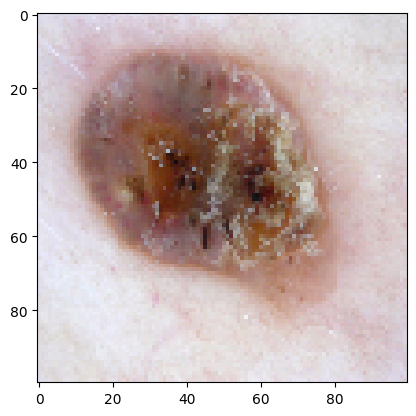

In [30]:
i = x_train[215]
plt.imshow(i)

In [31]:
def generate_images(num_images):
    for i in range(num_images):
        image = model.generate_image()
        yield image

    # Check for StopIteration exception
    try:
        next(model.generate_image())
    except StopIteration:
        pass


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 33, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 256)        0

In [33]:
y_train = y_train.reshape(9000,7)

In [34]:
y_train[0]

array([1, 0, 0, 0, 0, 0, 0])

In [51]:
import tensorflow as tf



model.fit(
  x=x_train,
  y=y_train,
  epochs=20
)


Epoch 1/20
282/282 [==============================] - 4s 15ms/step - loss: 0.6569 - accuracy: 0.7416
Epoch 2/20
282/282 [==============================] - 4s 14ms/step - loss: 0.5958 - accuracy: 0.7679
Epoch 3/20
282/282 [==============================] - 4s 15ms/step - loss: 0.5641 - accuracy: 0.7793
Epoch 4/20
282/282 [==============================] - 4s 15ms/step - loss: 0.5328 - accuracy: 0.7943
Epoch 5/20
282/282 [==============================] - 4s 14ms/step - loss: 0.5082 - accuracy: 0.8036
Epoch 6/20
282/282 [==============================] - 5s 18ms/step - loss: 0.4747 - accuracy: 0.8138
Epoch 7/20
282/282 [==============================] - 4s 14ms/step - loss: 0.4410 - accuracy: 0.8313
Epoch 8/20
282/282 [==============================] - 4s 14ms/step - loss: 0.4065 - accuracy: 0.8383
Epoch 9/20
282/282 [==============================] - 4s 15ms/step - loss: 0.3667 - accuracy: 0.8588
Epoch 10/20
282/282 [==============================] - 4s 14ms/step - loss: 0.3377 - accura

In [52]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 7ms/step - loss: 13.0192 - accuracy: 0.3961


[13.01919174194336, 0.39605912566185]